In [1]:
import pandas as pd
df = pd.read_csv("G:\ExcelR\Assignments\downloaded files\Logistic Regression\Logistic Regression\\Titanic_test.csv")
df

<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Riyanshika\AppData\Local\Temp\ipykernel_1732\3301129296.py:2: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("G:\ExcelR\Assignments\downloaded files\Logistic Regression\Logistic Regression\\Titanic_test.csv")


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
print("missing values",df.isnull().sum())

missing values PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [13]:
print("statictical summery")

df[["PassengerId", "Pclass", "Name", "Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]].describe()

statictical summery


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


histogram


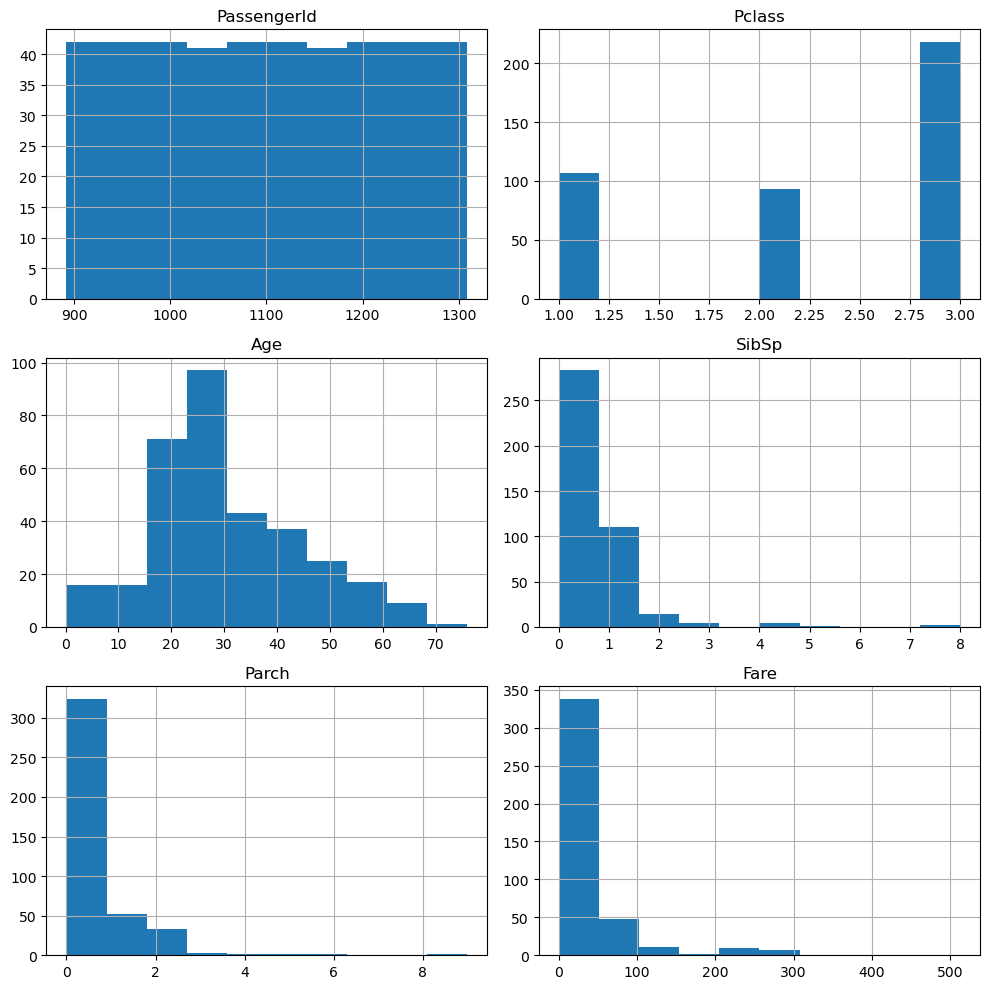

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("histogram")
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

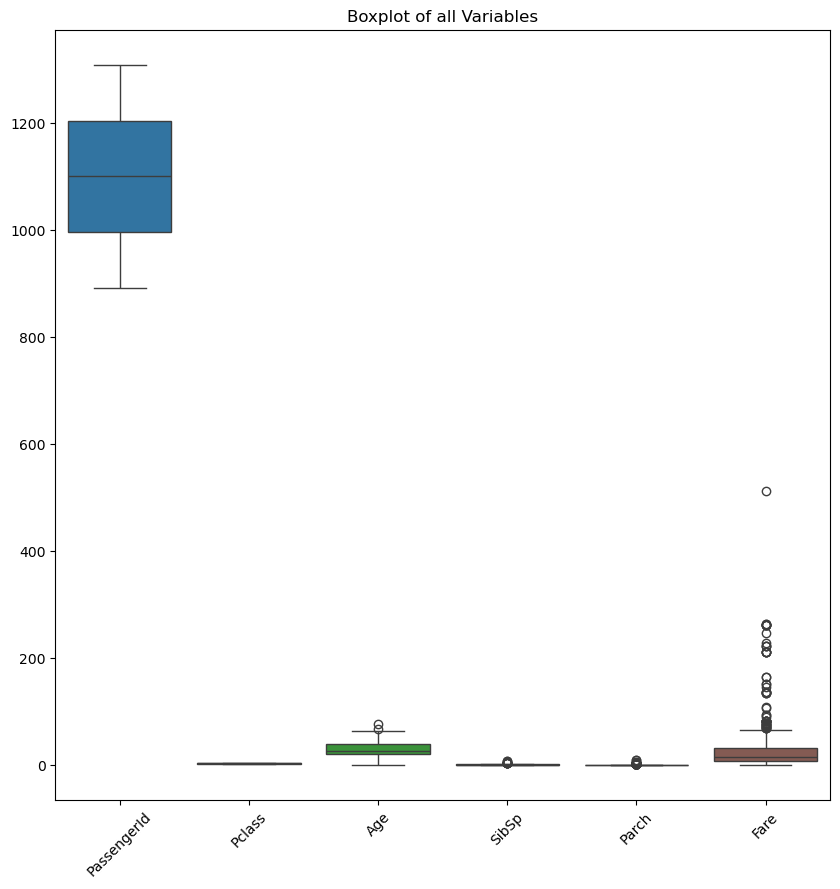

In [31]:
#boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.title("Boxplot of all Variables")
plt.xticks(rotation=45)
plt.show()

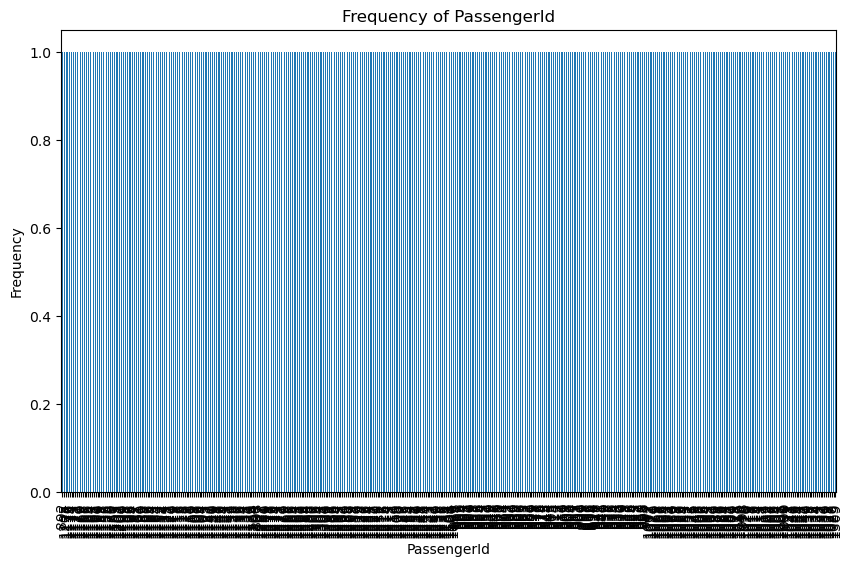

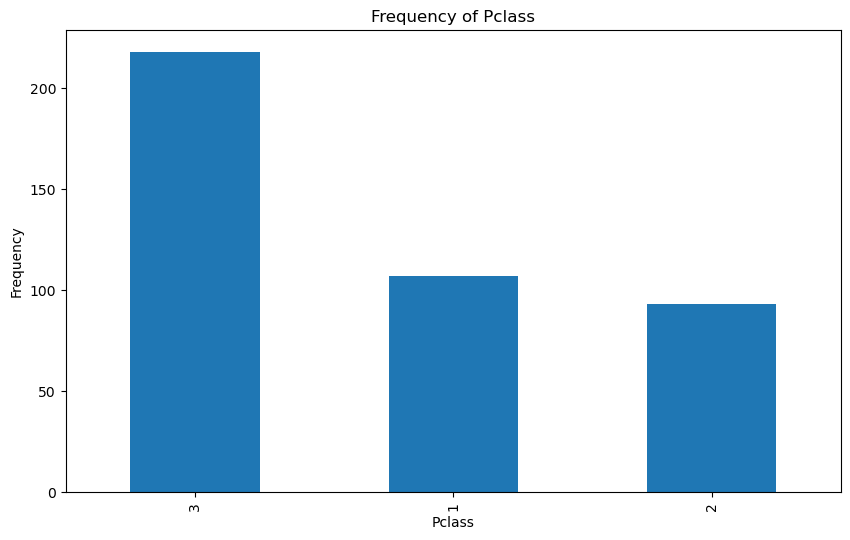

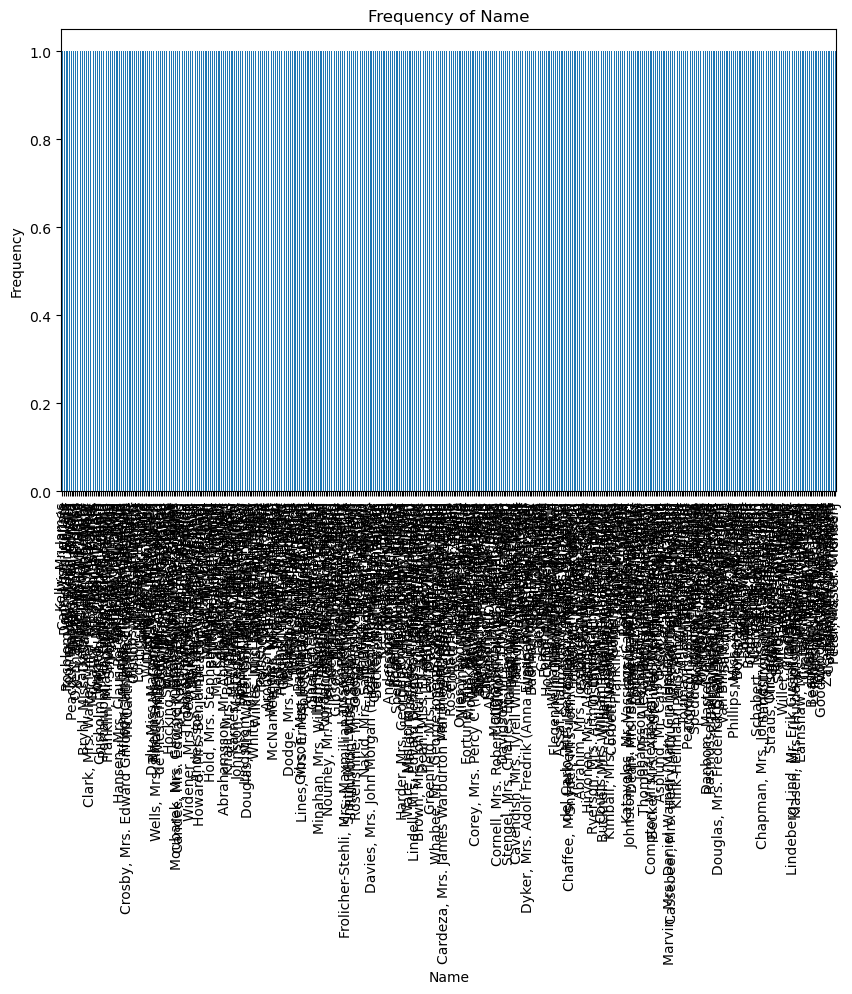

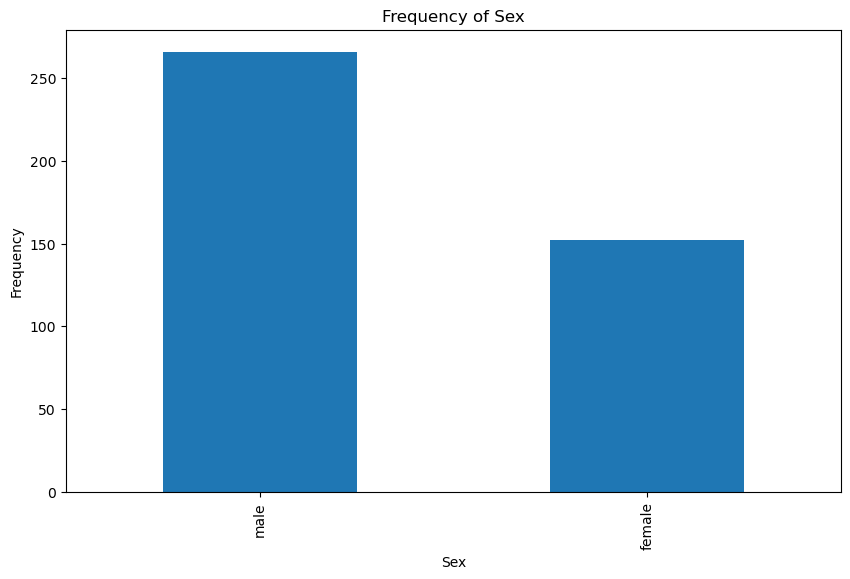

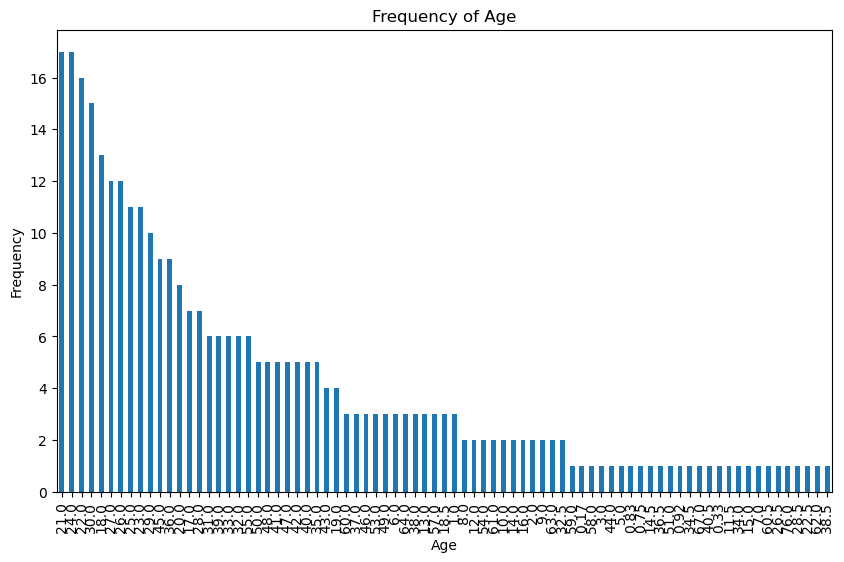

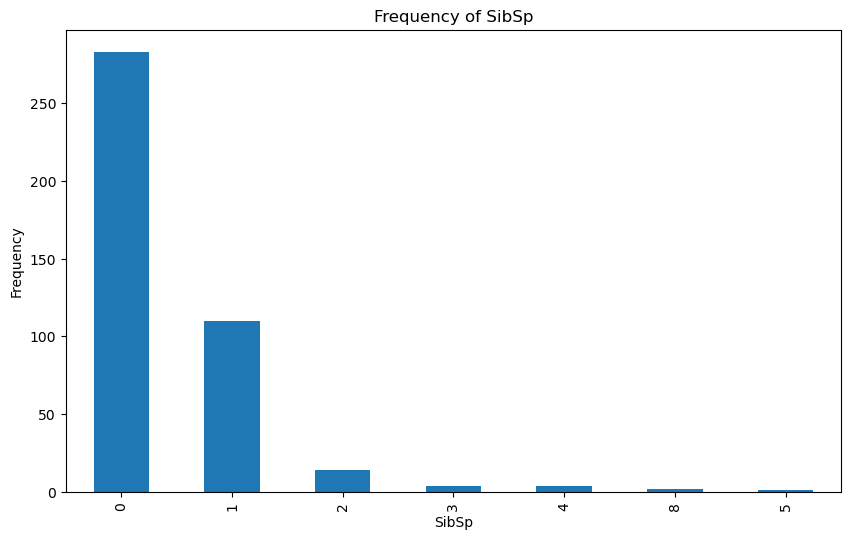

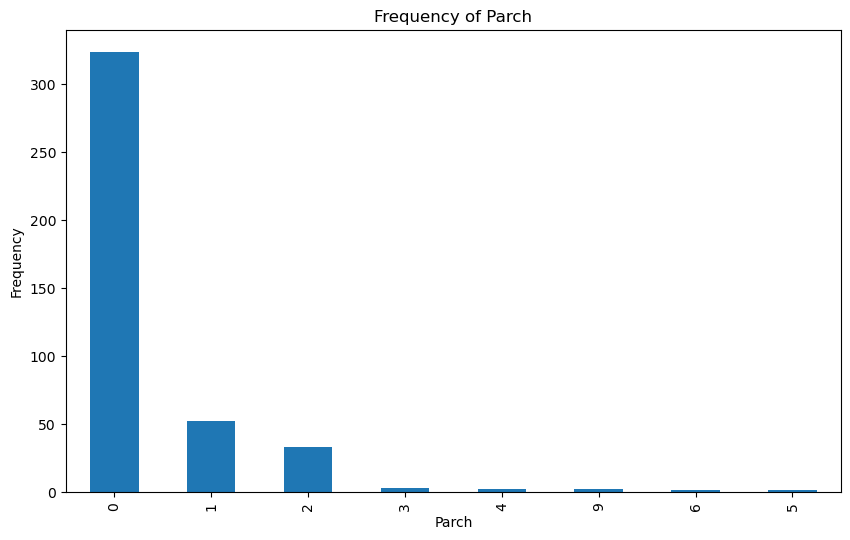

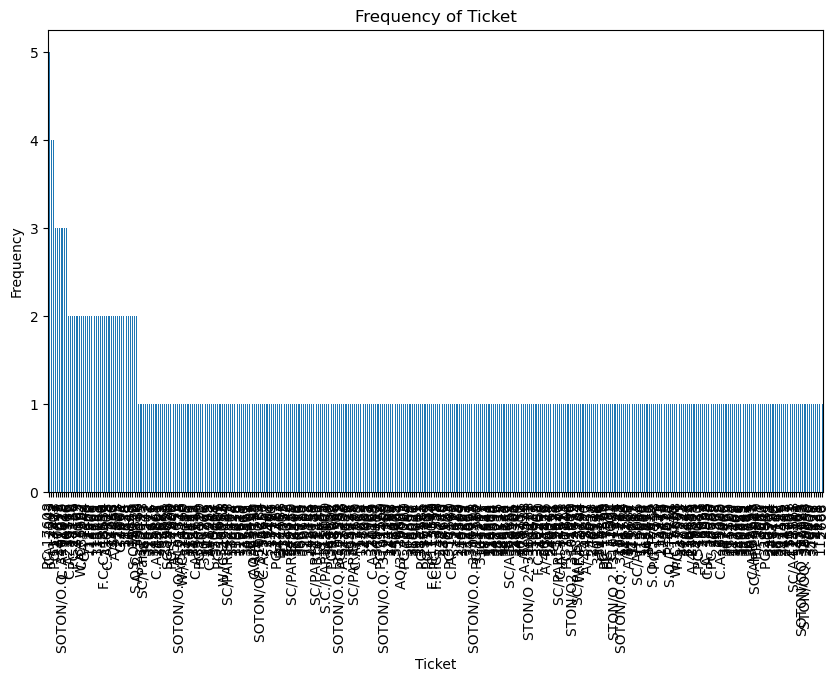

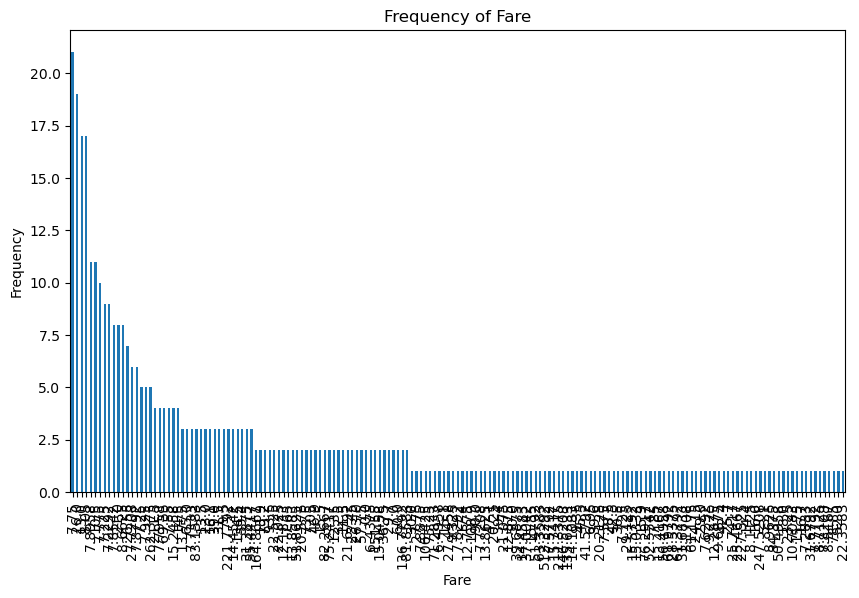

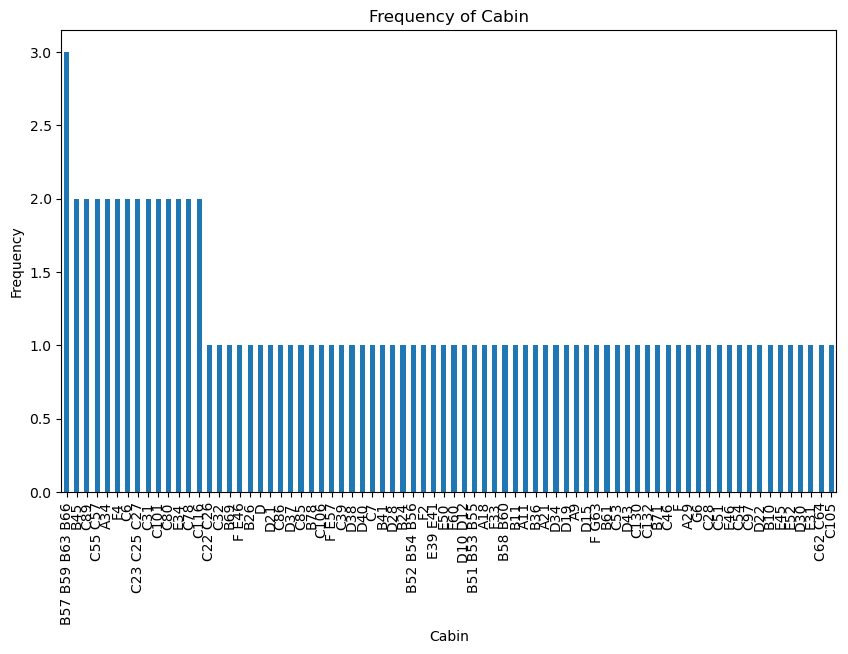

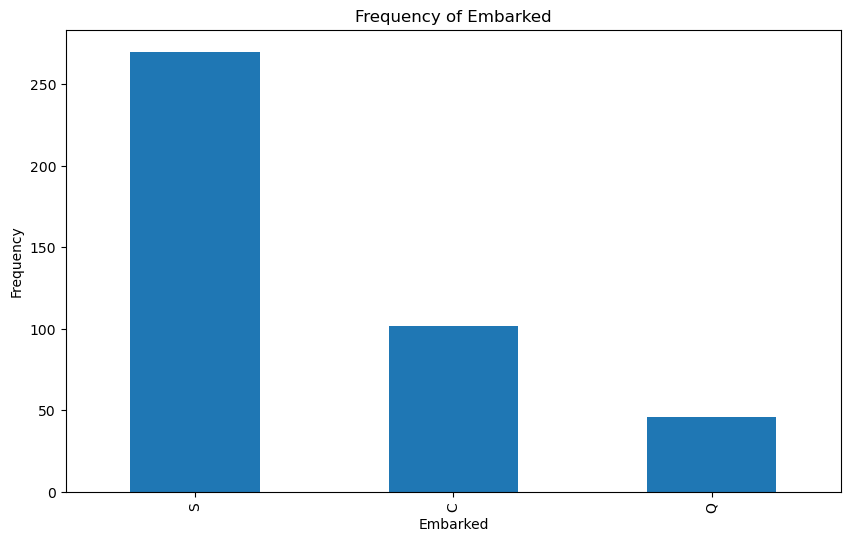

In [33]:
# Select the variables for the bar graph
variables = ["PassengerId", "Pclass", "Name", "Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
# Plot bar graphs for each variable
for var in variables:
    plt.figure(figsize=(10,6))
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

scatterplot


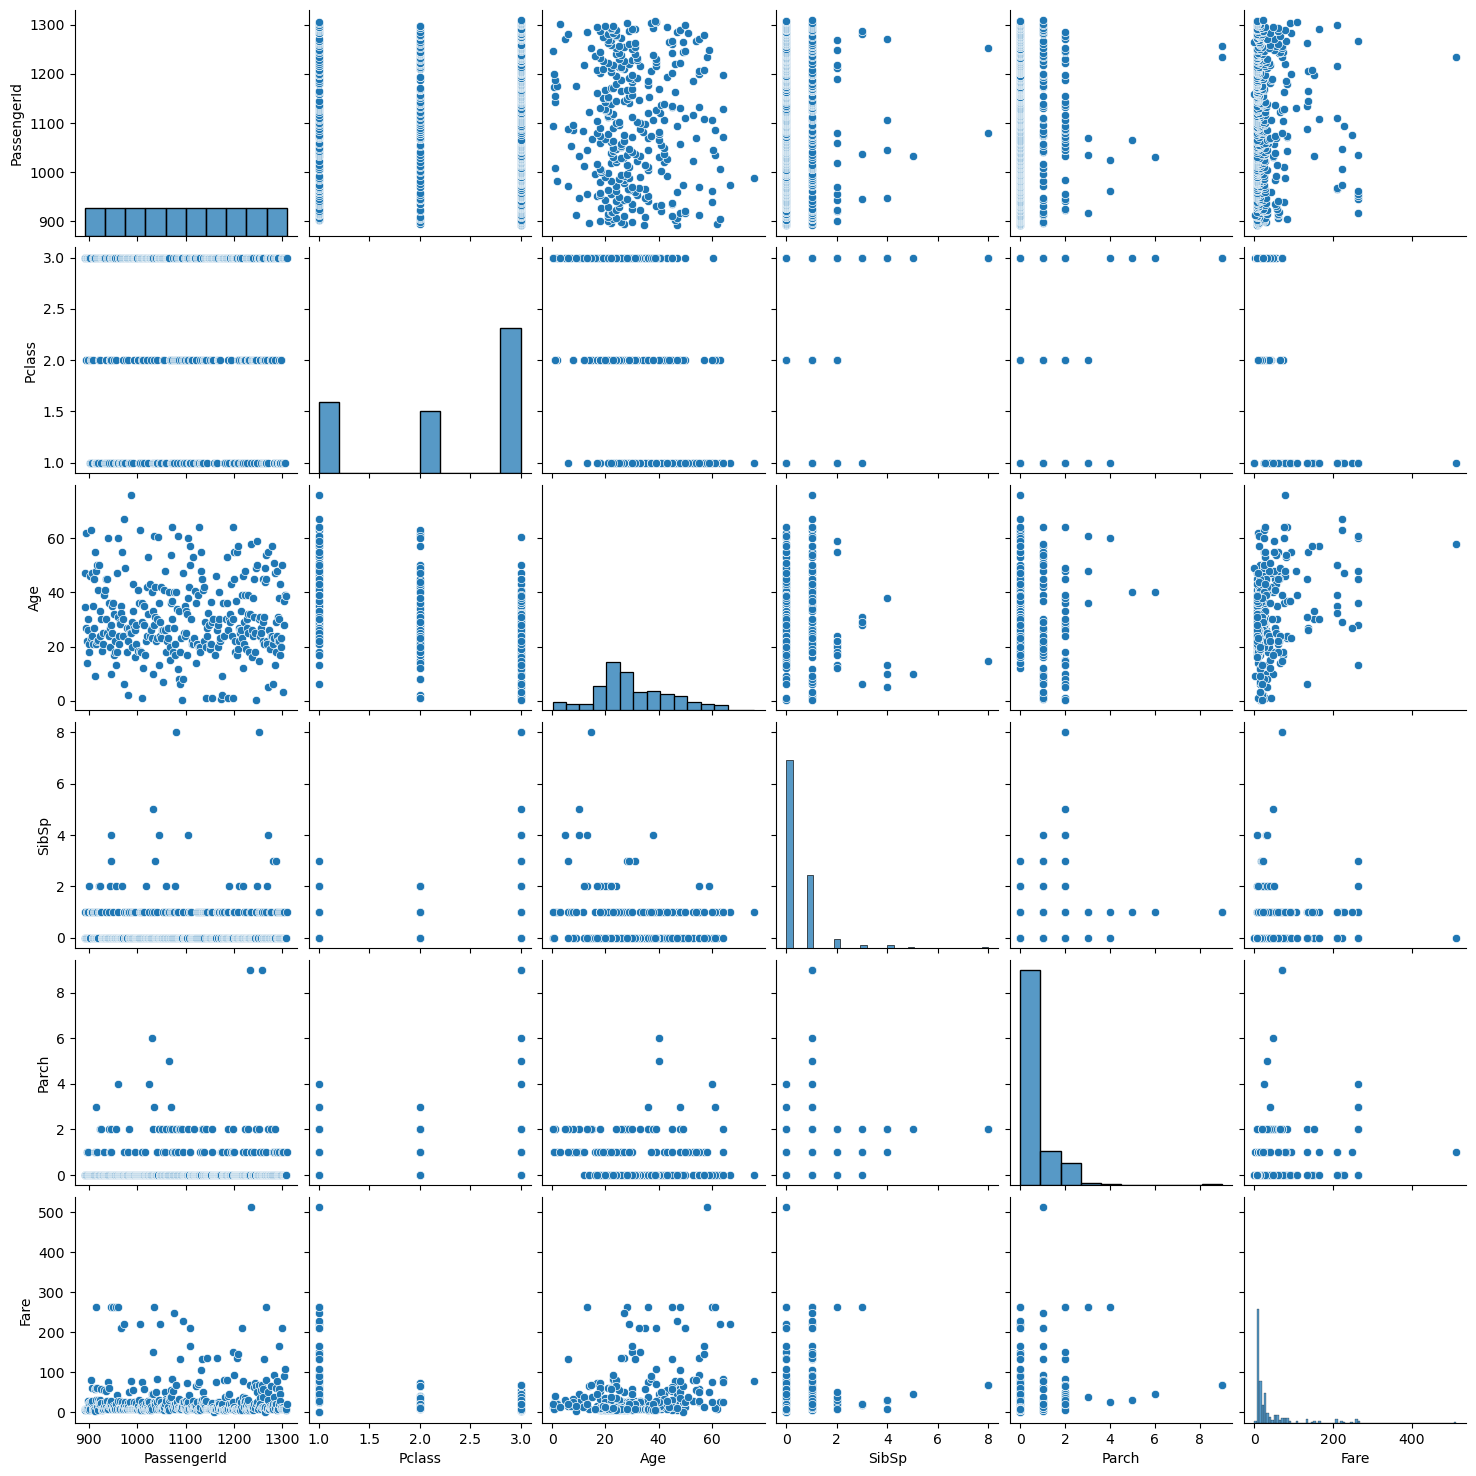

In [39]:
sns.pairplot(df)
print("scatterplot")
plt.show()

In [ ]:
#correlation_matrix=df.corr
#sns.heatmap(correlation_matrix, cmap='coolwarm')
#print("correlation")
#plt.show()

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
print("Correlations:")
plt.show()

Correlations:


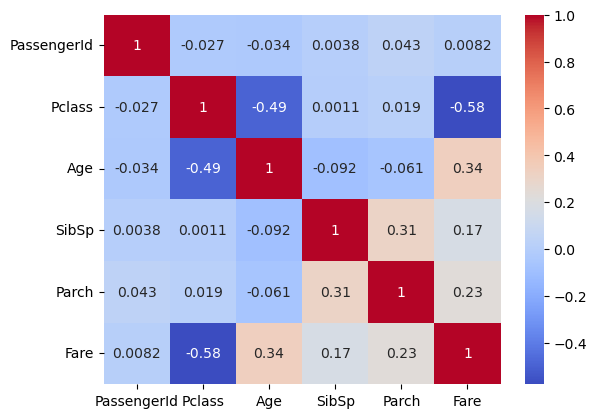

In [57]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
print("Correlations:")
plt.show()

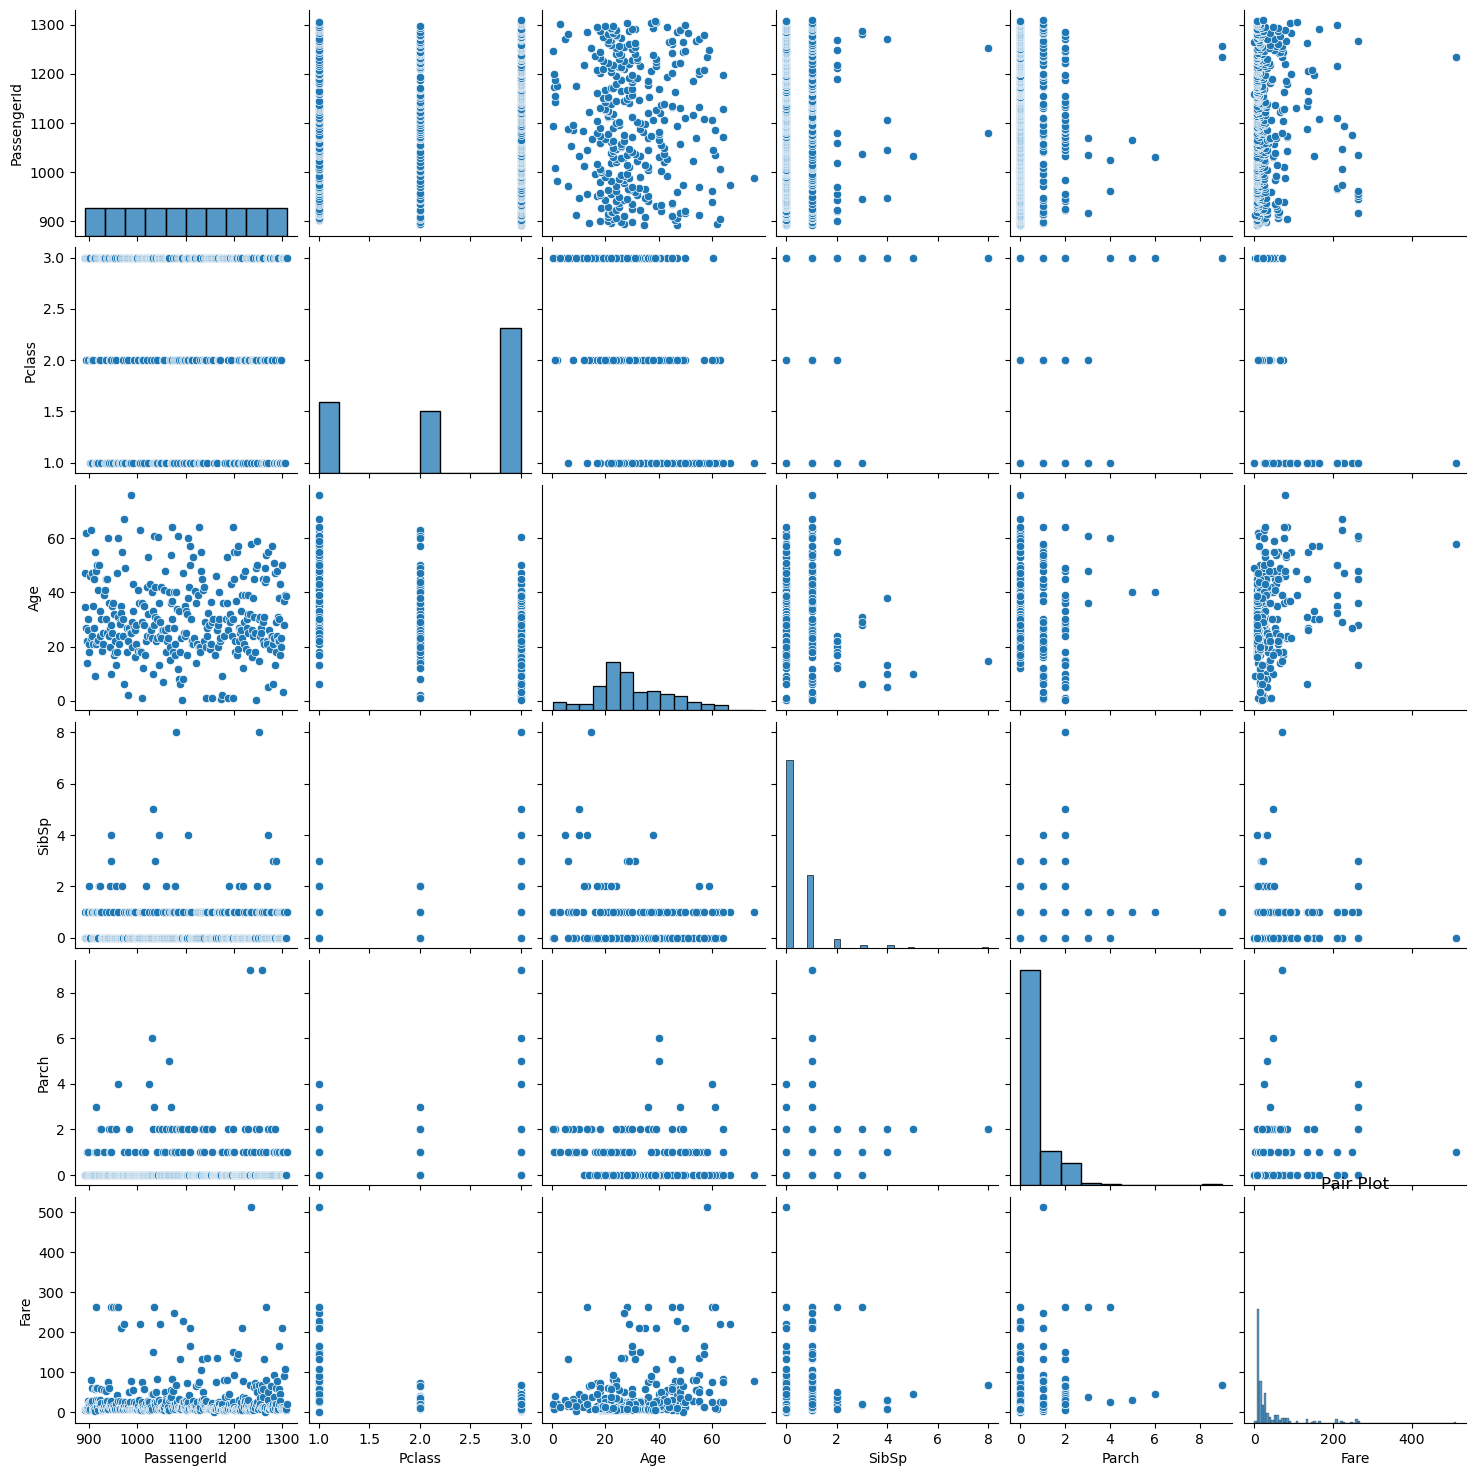

In [55]:
sns.pairplot(df)
plt.title('Pair Plot')
plt.show()

In [67]:
#Handle missing values (e.g., imputation).

from sklearn.preprocessing import LabelEncoder

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean()) # Fill missing numerical values with the mean for numerical columns only

# identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle remaining NaNs

# Assuming 'Survived' is the target variable (you might need to adjust this)
X = df.drop('Embarked', axis=1)  # Replace 'Survived' with your actual target column
y = df['Embarked']

# Impute remaining missing values in the entire dataset
imputer = SimpleImputer(strategy='most_frequent') # Use most_frequent for categorical features
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6785714285714286
Confusion Matrix:
 [[ 3  1 16]
 [ 0  0  8]
 [ 1  1 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.15      0.25        20
           1       0.00      0.00      0.00         8
           2       0.69      0.96      0.81        56

    accuracy                           0.68        84
   macro avg       0.48      0.37      0.35        84
weighted avg       0.64      0.68      0.60        84



C:\Users\Riyanshika\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
# Visualize the ROC curve.

from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Make predictions on the test set (if not already done)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# For ROC-AUC, you need probability scores instead of predicted classes
y_pred_proba = model.predict_proba(X_test)

# Calculate ROC AUC for multiclass
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr') # Handle multiclass ROC AUC

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.6785714285714286
Precision: 0.6401098901098901
Recall: 0.6785714285714286
F1-score: 0.5968372423596304
ROC-AUC Score: 0.6771146616541354


In [73]:
# Get the coefficients
coefficients = model.coef_

# Assuming 'df' is your original DataFrame, use its columns
feature_names = df.drop('Embarked', axis=1).columns # Exclude the target column

# Print the coefficients with feature names
for i, coef in enumerate(coefficients[0]):
    print(f"Feature: {feature_names[i]}, Coefficient: {coef}")

Feature: PassengerId, Coefficient: 6.991861344236595e-05
Feature: Pclass, Coefficient: -0.0033139486684020257
Feature: Name, Coefficient: 0.0015562344947733283
Feature: Sex, Coefficient: 0.0005131652216337295
Feature: Age, Coefficient: -0.016587025805120875
Feature: SibSp, Coefficient: -0.004275327302603318
Feature: Parch, Coefficient: -0.004256326346887834
Feature: Ticket, Coefficient: -0.0014750598743860654
Feature: Fare, Coefficient: 0.03822600493728511
Feature: Cabin, Coefficient: -0.0070089234716614835


In [75]:
# Get the coefficients
coefficients = model.coef_

# Assuming 'df' is your original DataFrame, use its columns
feature_names = df.drop('Embarked', axis=1).columns # Exclude the target column

# Print the coefficients with feature names and their absolute values for significance
for i, coef in enumerate(coefficients[0]):
    print(f"Feature: {feature_names[i]}, Coefficient: {coef}, Significance: {abs(coef)}") 

Feature: PassengerId, Coefficient: 6.991861344236595e-05, Significance: 6.991861344236595e-05
Feature: Pclass, Coefficient: -0.0033139486684020257, Significance: 0.0033139486684020257
Feature: Name, Coefficient: 0.0015562344947733283, Significance: 0.0015562344947733283
Feature: Sex, Coefficient: 0.0005131652216337295, Significance: 0.0005131652216337295
Feature: Age, Coefficient: -0.016587025805120875, Significance: 0.016587025805120875
Feature: SibSp, Coefficient: -0.004275327302603318, Significance: 0.004275327302603318
Feature: Parch, Coefficient: -0.004256326346887834, Significance: 0.004256326346887834
Feature: Ticket, Coefficient: -0.0014750598743860654, Significance: 0.0014750598743860654
Feature: Fare, Coefficient: 0.03822600493728511, Significance: 0.03822600493728511
Feature: Cabin, Coefficient: -0.0070089234716614835, Significance: 0.0070089234716614835
